<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Métodos de Ensemble: *Bagging* - Renda dos Americanos

## Importação das bibliotecas

In [1]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas de Desempenho
import preditiva

## Importação da base de dados

In [3]:
df = pd.read_csv('censo_eua.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preparação dos Dados

### Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Duplicações

In [8]:
df.duplicated().sum()

23

In [9]:
df.drop_duplicates(inplace=True)

### Tipos de Variáveis

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Análise Exploratória dos Dados

### Dispersão por Classe

C:\Users\Thiago\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


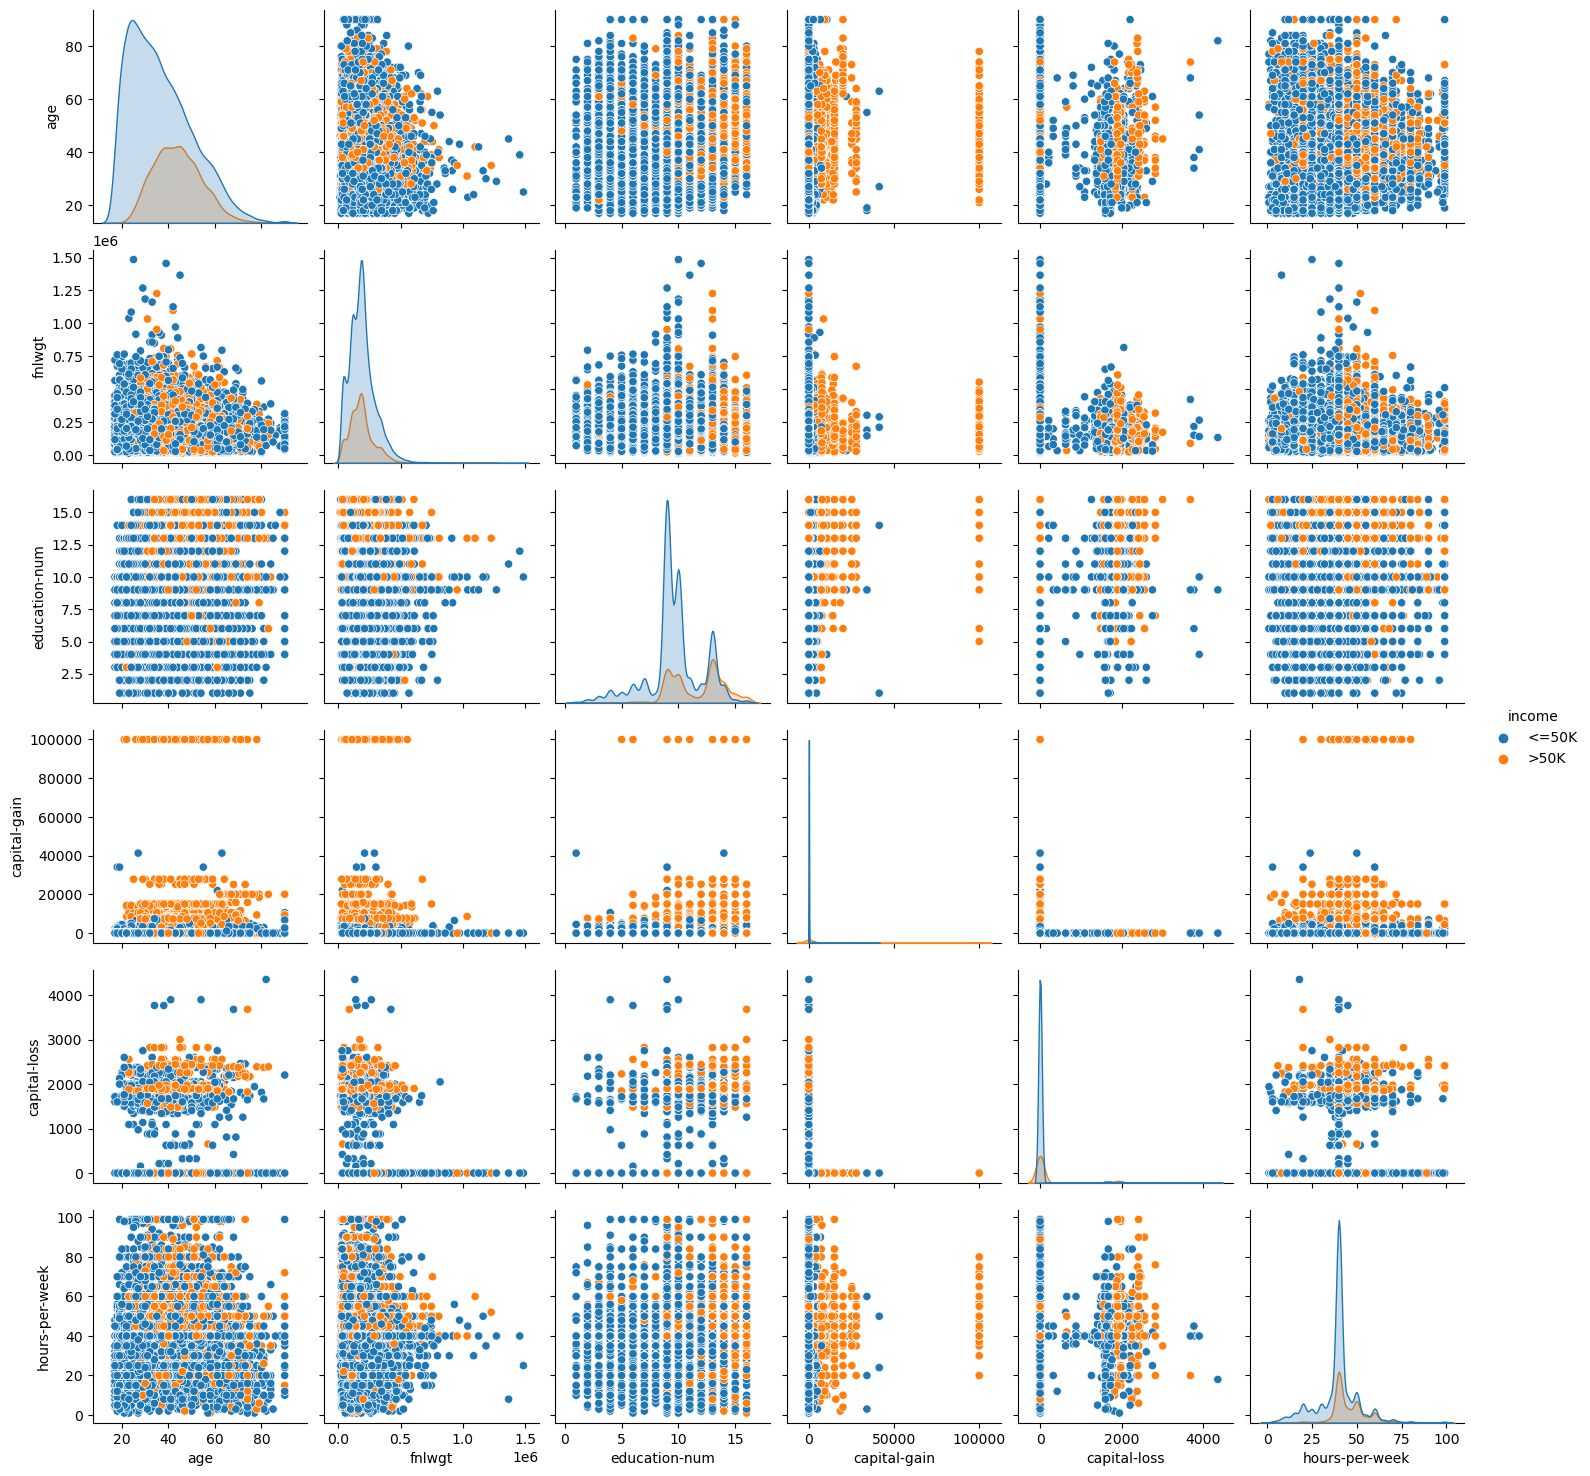

In [12]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='income');

### Relatórios Pandas Profiling e SweetViz

In [18]:
df['target'] = np.where(df['income']=='<=50K', 0, 1)
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='target')
sns.reset_defaults()

C:\Users\Thiago\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |                                             | [  0%]   00:00 ->…

Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [19]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0


In [20]:
# Target (variável resposta)
y_var = 'target'
y = df[y_var]

# Features (variáveis explicativas)
x_var = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
    ]
x = pd.get_dummies(df[x_var], drop_first=True)

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [22]:
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Divisão das bases em Treino e Teste

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [24]:
x_train.shape

(21097, 96)

In [25]:
x_test.shape

(9042, 96)

### Modelo individual: Regressão Logística

In [26]:
# Definição do modelo
modelo_rl = LogisticRegression(max_iter=1000)

# Ajuste do Modelo
modelo_rl.fit(x_train, y_train)
  
# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.792056,0.788542,-0.00
AUROC,0.584685,0.574406,-0.02
KS,0.241588,0.243759,0.01
Precision,0.712012,0.728144,0.02
Recall,0.266066,0.265155,-0.00
F1,0.387376,0.388747,0.00


### Métodos de Ensemble: *Bagging*

In [27]:
# Inicia o estimador base para o Bagging
modelo_base = LogisticRegression(max_iter=1000)
  
# Quantidade de estimadores
num_estimadores = 100
  
# Classificador de Bagging
modelo_bagging = BaggingClassifier(base_estimator = modelo_base, 
                                   n_estimators = num_estimadores, 
                                   max_samples=0.5,
                                   max_features=0.5,
                                   random_state = 42, 
                                   n_jobs=6) 

# Ajuste do Modelo
modelo_bagging.fit(x_train,y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_bagging, x_train, y_train, x_test, y_test)

C:\Users\Thiago\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Treino,Teste,Variação
Acurácia,0.813007,0.810108,-0.00
AUROC,0.881601,0.883437,0.00
KS,0.601548,0.603049,0.00
Precision,0.881928,0.896694,0.02
Recall,0.280836,0.283908,0.01
F1,0.426015,0.431269,0.01


### Métodos de Ensemble: *Bagging Random Forest*

In [28]:
modelo_rf = RandomForestClassifier(n_estimators=100, 
                                   min_samples_leaf=10, 
                                   max_depth=3,
                                   random_state = 42)
modelo_rf.fit(x_train, y_train)

# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_rf, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.790681,0.786552,-0.01
AUROC,0.896229,0.901285,0.01
KS,0.611053,0.623754,0.02
Precision,0.990160,0.994550,0.00
Recall,0.154422,0.159180,0.03
F1,0.267176,0.274436,0.03
